<a href="https://colab.research.google.com/github/murali-marimekala/tensorflow_deeplearning_bootcamp/blob/main/4_Neural_Network_Classification_with_Tensorflow/1_Neural_Network_Classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


### Types of classification
1. Classification
2. Multi-classification problems (100 different classes / foods, cars , animals etc) : **One label per sample**
3. Multi-label classification:  **Multiple labels per sample**

## Classification
What will be covered ?
1. Architecture of a neural network classification model.
2. Input shapes and output shapes of a classification model (features and labels)
3. Creating custom data to view and fit
4. Steps in modelling
5. Creating a model, compiling a model, fitting a model, evaluating a model
6. Different classification evalation methods
7. Saving and loading models

# Classification inputs and outputs

Inputs -> Machine learning Algorithm -> Output

Multiclass classification of predicting an image involves

Input Images -> Numerical encoding of pixel values (Height , Width , C (RGB)) -> Turn this data into Tensor -> ML Alogirthm -> Predictd Output -> Actual output

Usually the Tensor looks like  [Batchsize, height, width, colour_channels]

Introduction to NN classificaiton with tensorflow.

We are going to explore
1. How to write NN for classificaito problem where we classify as something or another.
* Binary Classificaiton
* Multiclass Classification
* Multilabel Classification

## Creating Data to view and fit

In [2]:
from sklearn.datasets import make_circles
#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
#Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
#Check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Which classificaiton is it ? Our data is hard to understand. Lets visualize

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles.label.value_counts()

,count
label,
1,500
0,500


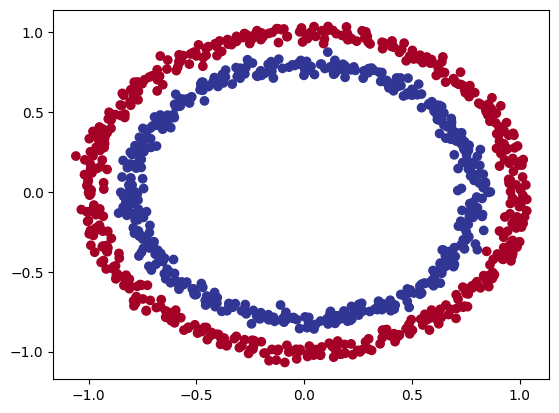

In [7]:
#Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1],c=y, cmap=plt.cm.RdYlBu)

Tensorflow playground is interesting.
https://playground.tensorflow.org

In [8]:
#Check shape of features and lables
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
#Now length of featuresand labels
len(X), len(y)


(1000, 1000)

In [10]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
#Lets write a NN code with tensorflow
#Set the radom seed
tf.random.set_seed(42)

#1. Create the model with Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"]) # Accuracy states : out of 100 samples how manyour model get it right

#3. Fit the model
model_1.fit(X,y,epochs=100)

#4. evaluate the model
model_1.evaluate(X,y)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4769 - loss: 6.6480
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4833 - loss: 6.3952
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4896 - loss: 6.0515
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4851 - loss: 5.3461
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5125 - loss: 0.8017
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5133 - loss: 0.7120
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5135 - loss: 0.6968
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5137 - loss: 0.6935
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5120 - loss: 0.6932
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5083 - loss: 0.6936
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 0.6940
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accu

[0.6932879686355591, 0.4729999899864197]

In [12]:
#Lets improve our model by training it longer. Its 48% accurate till now
model_1.fit(X,y,epochs=100, verbose=0)
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

Since we are working on Binary classification problem. Our model is getting 48% accuracy. Its just guessing. Lets add one more layer.

In [13]:
#Set random seeed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_2.fit(X,y,epochs=100, verbose=0)

#4. Evaluate the model
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 7.8989


[7.971191883087158, 0.5]

# Improving the model

1. Create a model - Add more layers or increase the number of hidden units within a layer
2. Compile a model - Here we might want to choose a different optimization function such as atom instead of SGD(). Change activation function, optimization function
3. Fitting a model - Perhaps we might fit our model for more epochs (leaving it training for longer). Change learning rate

In [14]:
#Set random seed
tf.random.set_seed(42)

#1. Create a model with 3 layers now
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model with new optimizer Adam instead of SGD
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the mode
model_3.fit(X,y,epochs=100, verbose=0)


In [15]:
#Evaluate the model
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.6915  


[0.6953079104423523, 0.492000013589859]

Its still 100%. Its better we visualize the predictions and see whats happening and then we can fine tune the model.

In [16]:
#Check modles summary
model_1.summary()
model_2.summary()
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (32.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 100)                 │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,965 (15.49 KB)

 Trainable params: 1,321 (5.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,644 (10.33 KB)

In [17]:
#Lets visualize the predictions.
#First lets display predictions
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.5246371 ],
       [0.46003872],
       [0.45803475],
       [0.48748183],
       [0.48579377],
       [0.48353222],
       [0.5058191 ],
       [0.52343535],
       [0.46273327],
       [0.50633717],
       [0.4487757 ],
       [0.5310156 ],
       [0.5021342 ],
       [0.51085263],
       [0.49947906],
       [0.4783727 ],
       [0.4411326 ],
       [0.47423398],
       [0.45158514],
       [0.44417694],
       [0.5243501 ],
       [0.4841615 ],
       [0.46423918],
       [0.52511024],
       [0.4606513 ],
       [0.45357823],
       [0.5223489 ],
       [0.51880765],
       [0.48082748],
       [0.50466144],
       [0.45414636],
       [0.5014211 ],
       [0.50628495],
       [0.53004444],
       [0.4597621 ],
       [0.47093427],
       [0.47742397],
       [0.5229484 ],
       [0.48184517],
       [0.53364635],
       [0.4453912 ],
       [0.5245081 ],
       [0.44269404],
       [0.5171125 ],
       [0.43995398],
       [0.4420599 ],
       [0.49167258],
       [0.515

To visualize our models predictions, lets create a function 'plot_decision_boundary()' , this function will

* Take in a trainedmodel, feature(X) and labels(y)
* Create a mesh grid of the different X values
* Make predictions across mesh grid
* Plot the predictions as well as a line between zones (where each unique class falls)




In [18]:
import numpy as np

In [19]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [20]:
X[:,0].min()

-1.0595024599098635

In [21]:
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1337117525463374)

In [22]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  #Create X values (we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # Stack 2D arrays together

  #Make predictions
  y_pred =  model.predict(x_in)

  #check if multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classificaiton")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  #Plat the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


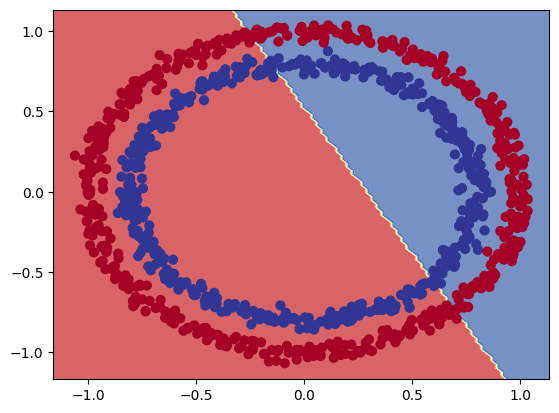

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

Useful resources
https://cs231n.github.io/neural-networks-case-study/
https://madewithml.com/

We have compiled our model for a binary classification problem.
But we are now working on a regression problem. Lets change the model to suit our data

In [24]:
#Lets see if our model can be used for regression problem
tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) #y = X + 1000

#Reshape X_regression to have 2 features
X_regression = X_regression.numpy().reshape(-1, 1)
#We are using numpy() to convert tf.Tensor to numpy array which has reshape function and -1 will preserve the elements and the remaining will put them in respective given dimnensions
X_regression = np.concatenate([X_regression, X_regression], axis=1) # Duplicate the feature to create a 2nd feature

#X_regression, y_regression

#Split our regression data into train and test tests
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Create a new model instance for regression
model_reg = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_reg.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])


#Fit the new model to the regression data
model_reg.fit(X_reg_train, y_reg_train, epochs=100) # Use model_reg instead of model_3

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 430.5337 - mae: 430.5337
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 266.5509 - mae: 266.5509 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 103.2916 - mae: 103.2916 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 74.6661 - mae: 74.6661 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 94.7591 - mae: 94.7591   
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 55.8073 - mae: 55.8073 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 51.0468 - mae: 51.0468 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.3411 - mae: 41.3411 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.5232 - mae: 46.5232 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.6924 - mae: 41.6924 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.7494 - mae: 42.7494 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.0149 - mae: 40.0149 
Epoch 13/100
5/5 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


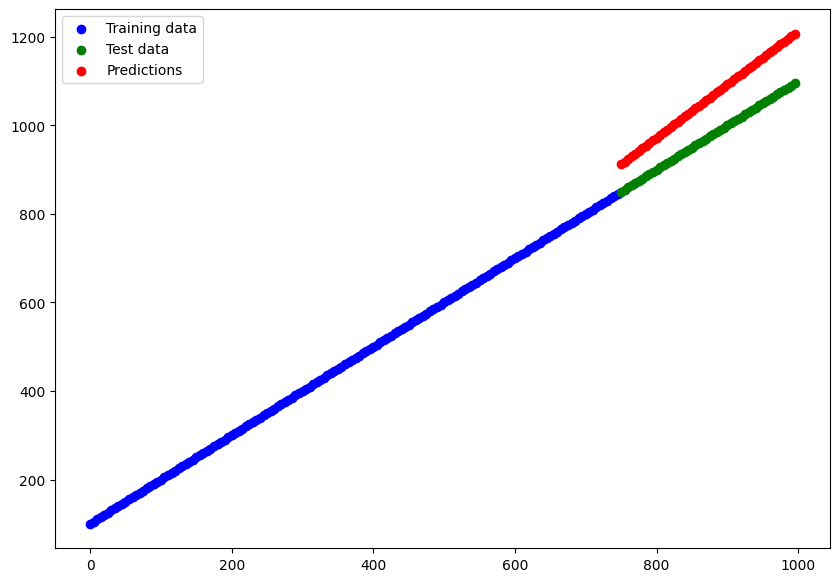

In [25]:
#Make predictions with our trainied model
y_reg_preds = model_reg.predict(X_reg_test)
y_reg_preds

#Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
# X_reg_train has 2 features, but we only need one for plotting against y_reg_train
plt.scatter(X_reg_train[:, 0], y_reg_train, c="b", label="Training data") # Use only the first feature for plotting
plt.scatter(X_reg_test[:, 0],  y_reg_test, c="g", label="Test data") # Use only the first feature for plotting
plt.scatter(X_reg_test[:, 0], y_reg_preds, c="r", label="Predictions") # Use only the first feature for plotting
plt.legend()

In [26]:
#The missing piece seems to be the non linearity in our model.

In [27]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
    ])
#2 Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
#3. Fit the model
model_4.fit(X,y,epochs=100)





Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5050 - loss: 5.9104   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5053 - loss: 5.8923 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5076 - loss: 5.8826 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5076 - loss: 5.8403 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 5.8601 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 5.8852 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 5.8835 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 5.8739 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 5.8734 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5054 - loss: 5.8731
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5054 - loss: 5.8729 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

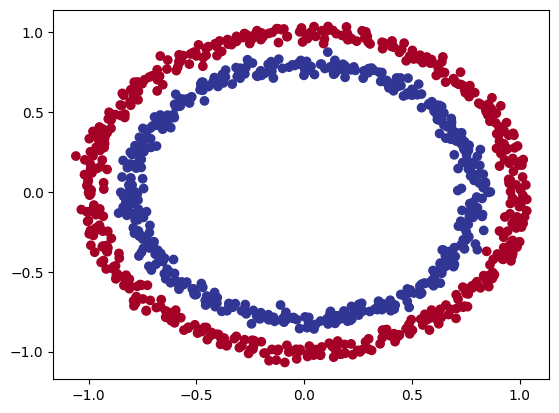

In [28]:
#Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


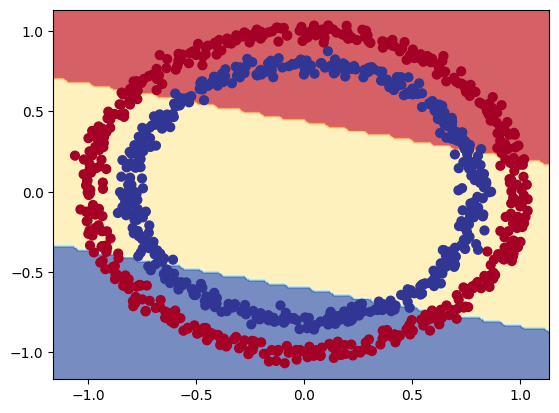

In [29]:
#Check the decision boundary for our latest model
plot_decision_boundary(model_4, X=X, y=y)

In [30]:
#Try using ReLU

#Set the random seed
tf.random.set_seed(42)

#1. Create a model with non-linear activation
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4792 - loss: 4.5647   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4815 - loss: 4.4885 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4903 - loss: 4.4525 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4917 - loss: 4.3885 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4935 - loss: 4.2979
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4925 - loss: 4.2856 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4935 - loss: 4.2780 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4943 - loss: 4.2641 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4936 - loss: 4.2201 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4902 - loss: 4.1019 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5028 - loss: 3.9704 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [31]:
#TRying to replicate the multi-layer NN from tensorflor play ground
#Set random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1) # Add a final layer with 1 unit and sigmoid activation
])

#2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4236 - loss: 5.2920
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4407 - loss: 4.6146
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4515 - loss: 4.1975
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4503 - loss: 2.4799
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4434 - loss: 2.0810
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4420 - loss: 2.0259
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4443 - loss: 1.9216
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4464 - loss: 1.7784
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4485 - loss: 1.6262
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4482 - loss: 1.3300
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4532 - loss: 1.0806
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [32]:
#Evaluate the model
model_6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4876 - loss: 0.7111


[0.7018423080444336, 0.5139999985694885]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


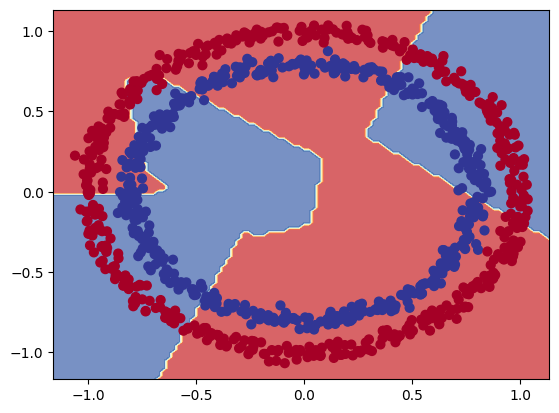

In [33]:
#How our model prediction look
import matplotlib.pyplot as plt # Import the pyplot module
plot_decision_boundary(model_6, X, y)

In [34]:
#Lets fix this for good
#Set random seed
tf.random.set_seed(42)

#1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")])

#2. Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

#3. Fit the model
model_7.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5130 - loss: 0.6916
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5157 - loss: 0.6900
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5116 - loss: 0.6889
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5177 - loss: 0.6879
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 0.6870
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5309 - loss: 0.6862
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5326 - loss: 0.6854
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5274 - loss: 0.6846
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5285 - loss: 0.6839
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5345 - loss: 0.6831
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 0.6824
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [35]:
#Lets Evaluate and check
model_7.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7746 - loss: 0.5557  


[0.5493137240409851, 0.7870000004768372]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


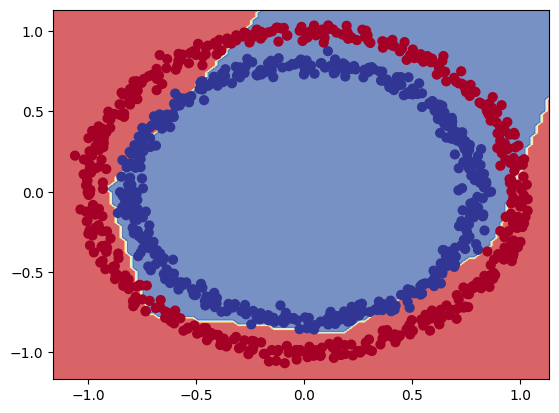

In [36]:
#Lets plot and check
plot_decision_boundary(model_7, X, y)

Now we are clear on linear and non linear functions. Lets see how they work.

In [37]:
#Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)

In [38]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

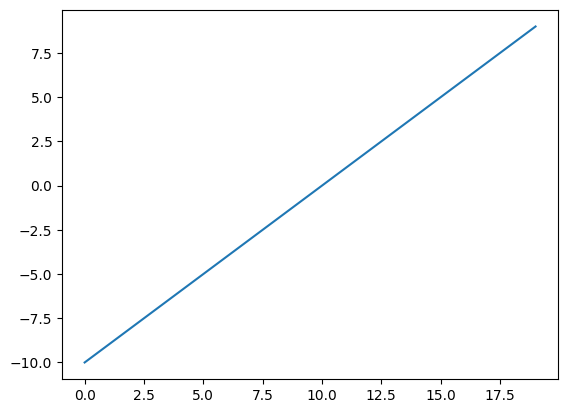

In [39]:
plt.plot(A)

In [40]:
# Lets start by replicating sigmoid  sigmoid(x) = 1 / (1+e-x)
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use sigmoid on our toy tensor A
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

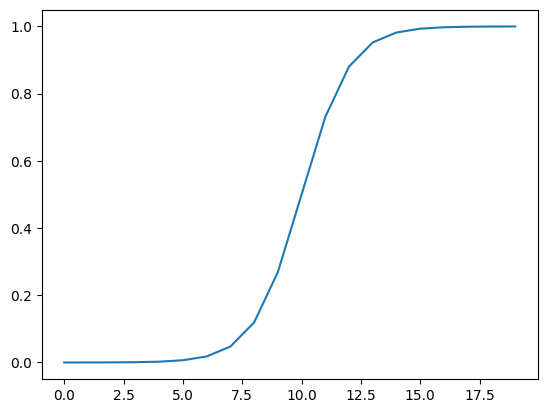

In [41]:
#Lets plot
plt.plot(sigmoid(A))

In [42]:
#Lets recreate ReLu function and check
def relu(x):
  return tf.maximum(0, x)

#Lets use Relu on toy tensor A
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

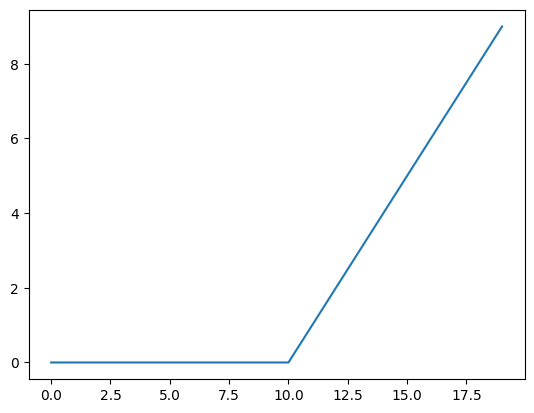

In [43]:
#Lets plot it
plt.plot(relu(A))

In [44]:
#Lets try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

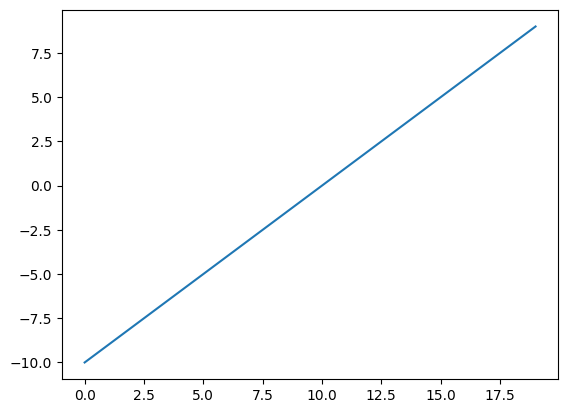

In [45]:
#Lets plot
plt.plot(tf.keras.activations.linear(A))

In [46]:
#Does A even change
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification models

So far we have been training and testing on the same dataset.
However , in machine learning this is basically a sin.

So lets create a training and test data set

In [47]:
#Check how many examples we have
len(X)

1000

In [48]:
#Split into train and test sets using indexing
X_train , y_train = X[:800], y[:800]
X_test, y_test =X[800:,], y[800:,]
X_train, y_train, X_test, y_test

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.64889467, -0.51222194],
        [-0.18878747,  0.74504113],
        [-0.27333143, -0.70507331]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [49]:
#Get shape
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [50]:
#Lets recreate a model to fit the training data and evaluate on the test data

#Set random seed
tf.random.set_seed(42)

# Before each fit call, recreate the model:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# Fit the model
history1 = model_8.fit(X_train, y_train, epochs=25)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4977 - loss: 0.6965
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5247 - loss: 0.6835 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5605 - loss: 0.6746 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6638 - loss: 0.6556 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7152 - loss: 0.6307 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7508 - loss: 0.5982 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7670 - loss: 0.5622 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7834 - loss: 0.5222 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4728 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8627 - loss: 0.4342 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8973 - loss: 0.3889 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

In [51]:
#4. Evlauate the model on test data set
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9634 - loss: 0.1013  


[0.09715387225151062, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing binary classification


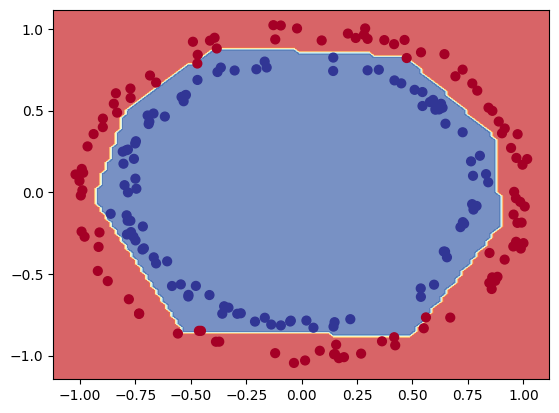

In [53]:
#Plot the model
plot_decision_boundary(model_8, X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing binary classification


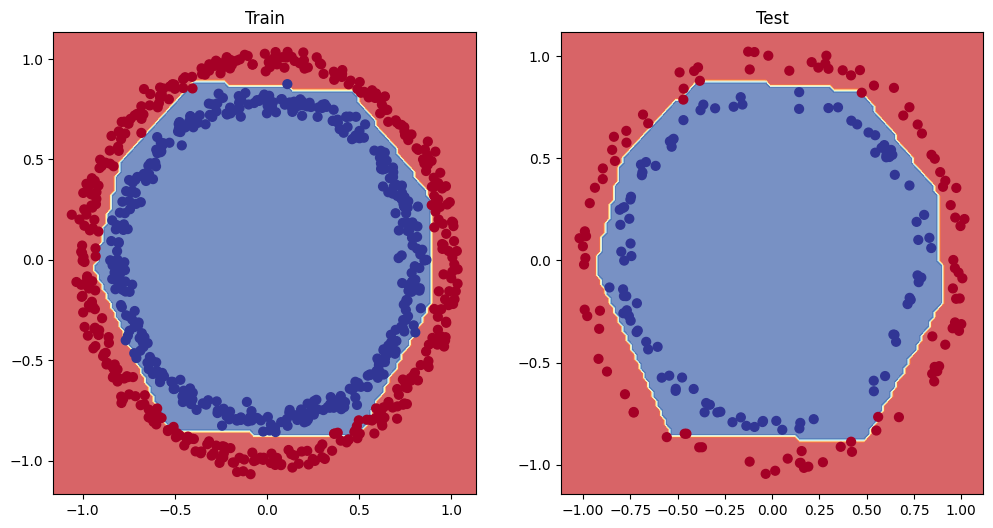

In [54]:
#Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) class

In [ ]:
# Now you can access history.history
history1.history

In [ ]:
#Convert the history object into a DataFrame
pd.DataFrame(history1.history)

In [ ]:
#Plot the loss curves
pd.DataFrame(history1.history).plot()
plt.title("Model 8 loss curves")

Loss function going down is model is improving


## Finding the best learning rate
To find the ideal learning rate (the learnign rate where the loss decreases the most during training) we are going to use the following steps:

* A learning rate  **callback** - you can think of a callback an extra piece of functionality, you can add to your model **while** its training.

* Another model (we could use the same one as abvoe, but we are practicing building models here)

* A modified loss curves plot

In [55]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model (same as model 8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#3. Fit the model (pass lr_scheduler callback)
history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4990 - loss: 0.7076 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4922 - loss: 0.7065 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4916 - loss: 0.7055 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4932 - loss: 0.7043 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.7031 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4950 - loss: 0.7018 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4995 - loss: 0.7004 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4972 - loss: 0.6990 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 0.6976 - learning_

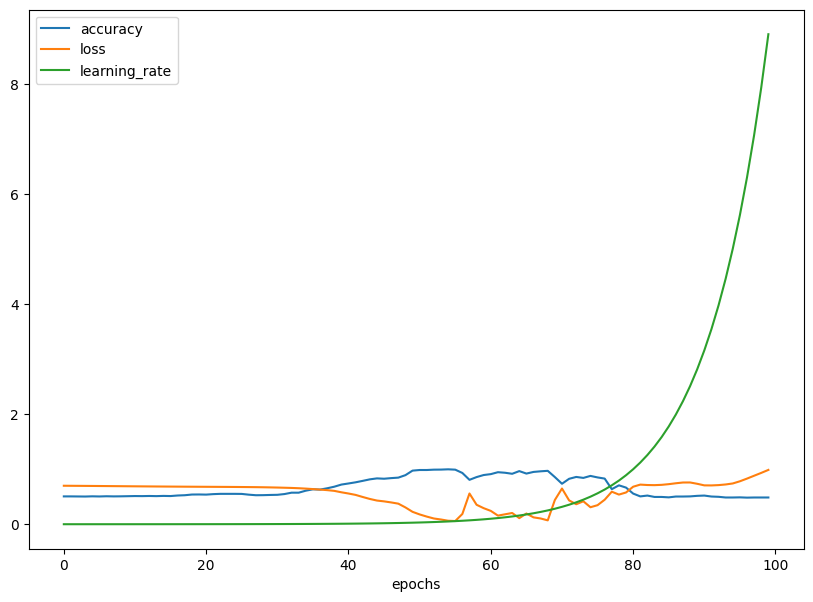

In [56]:
#Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs");

Text(0.5, 1.0, 'Learning Rate vs Loss')

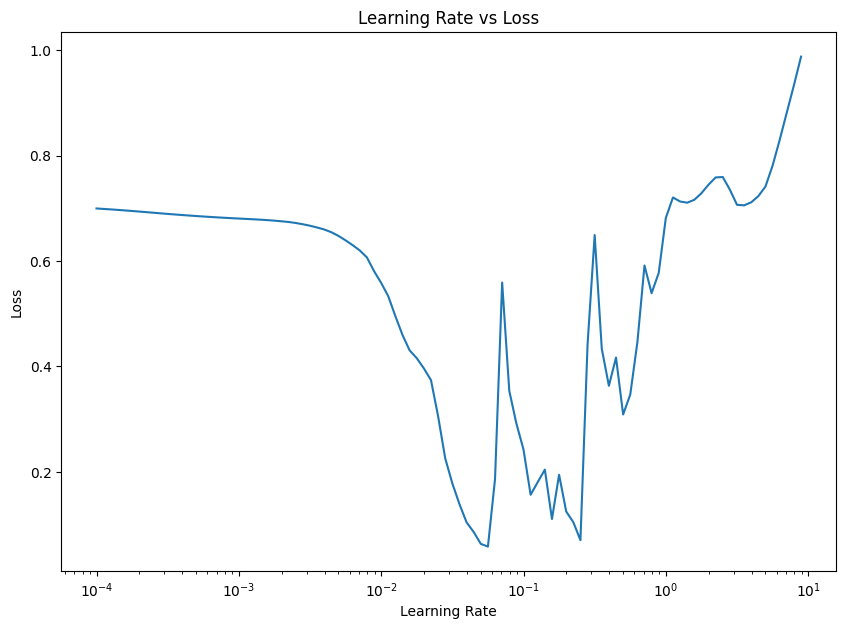

In [57]:
#Plot the learning rate vs the loss
import tensorflow as tf
import matplotlib.pyplot as plt
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [58]:
#Example of other typical learning rate values are
#10**0 , 10**-1, 10**-2, 10**-3, 10**-4


In [59]:
10**-2

0.01

In [60]:
0.02

0.02

In [61]:
#Lets trying using a higher ideal learning rate with same model as before
#Set random seed
tf.random.set_seed(42)

#Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compoile the model with ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

#Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4875 - loss: 0.6996
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5211 - loss: 0.6903
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5916 - loss: 0.6786
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6928 - loss: 0.6630 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7256 - loss: 0.6352 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7588 - loss: 0.5914 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7551 - loss: 0.5429 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8315 - loss: 0.4723
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9032 - loss: 0.3788 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9385 - loss: 0.3009 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9587 - loss: 0.2429 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.97

In [62]:
#Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9519 - loss: 0.1402  


[0.12875524163246155, 0.9549999833106995]

In [63]:
#Evaluate model 8 on test data
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9634 - loss: 0.1013 


[0.09715387225151062, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step
Doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Doing binary classification


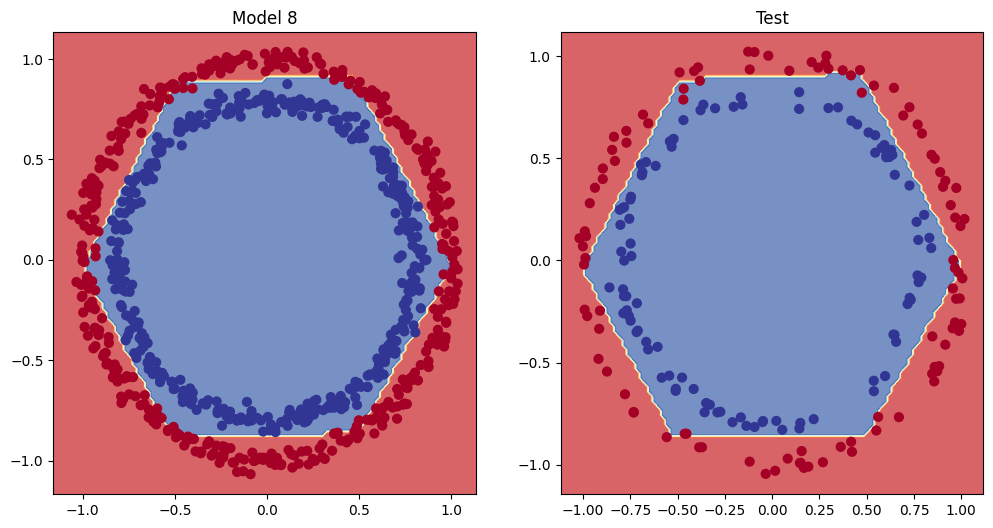

In [65]:
#Plot the decision boundaries for the trainign and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Model 8")
plot_decision_boundary(model_10, X=X_train, y=y_train) # Call the function directly using its name
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test) # Call the function directly using its name

# More classification evaluation methods
# Along side visualizing our models results as much as possible, there are other evaulation of other classification methods and metrics we should be familiar with
* Accuracy
* Precision
* Recall
* F1-Score
* Confusion metrics
* Classification report from scikit-learn

In [74]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9519 - loss: 0.1402 
Model loss on the test set: 0.12875524163246155
Model accuracy on the test set: 95.50%


In [75]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
y_preds = model_10.predict(X_test)
y_preds = tf.round(y_preds)
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[92,  9],
       [ 0, 99]])

In [76]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [78]:
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

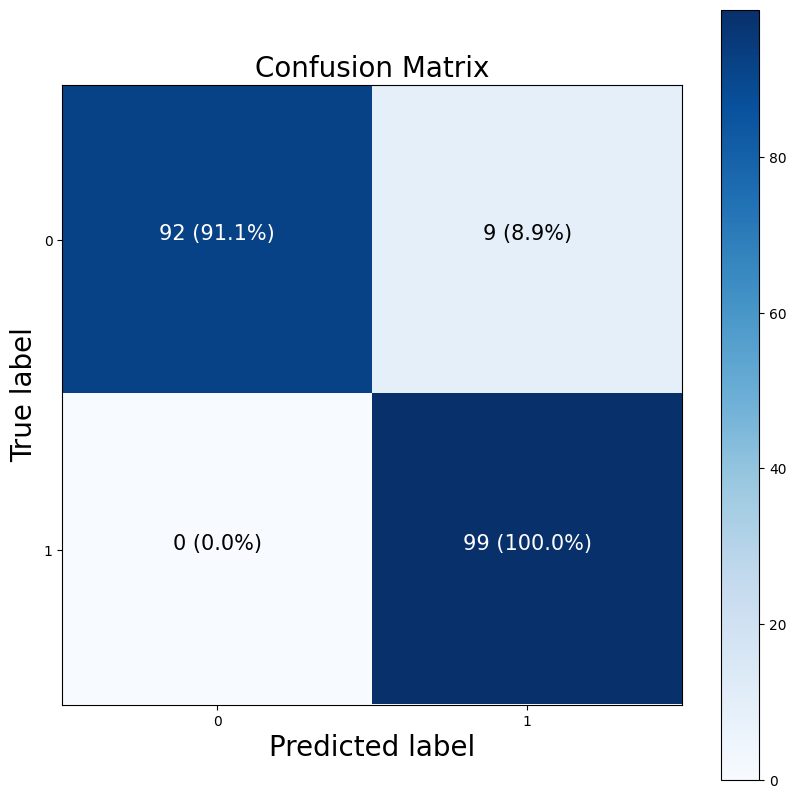

In [86]:
# Confusion matrix is remix of scikit-learns code
# https://github.com/scikit-learn/scikit-learn/blob/98ed9dc73/sklearn/metrics/_classification.py#L244
import itertools

figsize=(10,10)

#Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] #normalize our confusion matrix
n_classes = cm.shape[0]

#Lets prettify it
fig, ax = plt.subplots(figsize=figsize)

#Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#Create classes
classes = False

if classes:
  labels = classes
else:
  #labels = np.arange(cm.shape[10]) # cm.shape is (2,2), trying to get index 10 results in error
  labels = np.arange(cm.shape[0]) # The confusion matrix should have as many labels as classes (n_classes) which is equal to cm.shape[0]

#Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label")
ax.set_xticks(np.arange(n_classes))
ax.set_yticks(np.arange(n_classes))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

#Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set the threshold for different colors
threshold = (cm.max() + cm.min())/2

#Plot the text on each cell
for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment= "center",
           color="white" if cm[i,j] > threshold else "black",
           size=15)